In [1]:
%matplotlib notebook
from IPython.display import Latex
from PyFoam.RunDictionary.SolutionDirectory import SolutionDirectory
from PyFoam.RunDictionary.ParsedParameterFile import ParsedParameterFile
from PyFoam.Basics.DataStructures import Vector
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import os,shutil,glob
import pylab, re
import matplotlib.pyplot as plt
from tikzplotlib import save as tikz_save
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [2]:
A = pd.read_excel('/home/andres/Documents/GitHub/alaBatiente/Resultados/ResultadosPostanewDomain.xlsx',
                  usecols="A:I",nrows=8,skiprows=1,sheet_name='DatosParaPlot')   
data = A.to_numpy()
B = pd.read_excel('/home/andres/Documents/GitHub/alaBatiente/Resultados/ResultadosPostanewDomain.xlsx',
                  usecols="A:I",nrows=8,skiprows=11,sheet_name='DatosParaPlot')   
dataB = B.to_numpy()
C= pd.read_excel('/home/andres/Documents/GitHub/alaBatiente/Resultados/ResultadosPostanewDomain.xlsx',
                  usecols="A:I",nrows=7,skiprows=21,sheet_name='DatosParaPlot') 
dataC = C.to_numpy()

In [3]:
f_adim028,delta_adim028,CD028,CL028,St028,St2028,Cy028,StCy028,St2Cy028 = data.T
f_adim022,delta_adim022,CD022,CL022,St022,St2022,Cy022,StCy022,St2Cy022 =dataB.T
f_adim035,delta_adim035,CD035,CL035,St035,St2035,Cy035,StCy035,St2Cy035=dataC.T

<IPython.core.display.Javascript object>


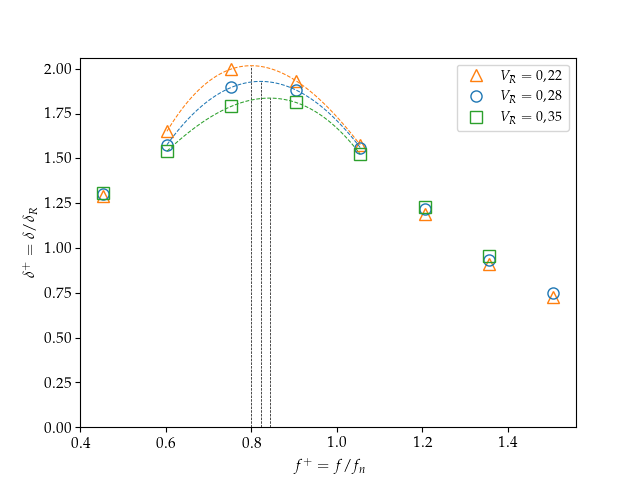

In [26]:
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
fig,ax = plt.subplots()
#Gráfico de los puntos de datos
ax.plot(f_adim022,delta_adim022,'^',color='tab:orange',markersize=8,label='$V_R=0,22$',fillstyle='none')
ax.plot(f_adim028,delta_adim028,'o',color='tab:blue',markersize=8,label='$V_R=0,28$',fillstyle='none')
ax.plot(f_adim035,delta_adim035,'s',color='tab:green',markersize=8,label='$V_R=0,35$',fillstyle='none')
ax.set_xlabel(r'$f^+=f/f_n$',size=11)
ax.set_ylabel(r'$\delta^+=\delta /\delta_R$',size=11)
ax.set_ylim(bottom=0)
ax.grid(False)
ax.legend(prop={'size': 11})
#Polyfit y plot de VR=0,28
z028=np.polyfit(f_adim028[1:5], delta_adim028[1:5], 3)
f028=np.poly1d(z028)
f_c028 = np.linspace(f_adim028[1],f_adim028[4],100)
d_c028 = f028(f_c028)
ax.plot(f_c028,d_c028,linestyle='dashed',color='tab:blue',linewidth=0.75)
#Máximo de VR=0,28
index_max028 = d_c028.argmax()
#ax.plot([f_adim.min(),f_c[index_max]],[d_c[index_max],d_c[index_max]],linestyle='--',linewidth=0.5,color='black')
ax.plot([f_c028[index_max028],f_c028[index_max028]],[0,d_c028[index_max028]],linestyle='--',linewidth=0.5,color='black')
#Polyfit y plot de VR=0,22
z022=np.polyfit(f_adim022[1:5], delta_adim022[1:5], 3)
f022=np.poly1d(z022)
f_c022 = np.linspace(f_adim022[1],f_adim022[4],100)
d_c022 = f022(f_c022)
index_max022 = d_c022.argmax()
ax.plot(f_c022,d_c022,linestyle='dashed',color='tab:orange',linewidth=0.75)
#Máximo de VR=0,22
#ax.plot([f_adim2.min(),f_c2[index_max2]],[d_c2[index_max2],d_c2[index_max2]],linestyle='--',linewidth=0.5,color='black')
ax.plot([f_c022[index_max022],f_c022[index_max022]],[0,d_c022[index_max022]],linestyle='--',linewidth=0.5,color='black')
#Polyfit y plot de VR=0,35
z035=np.polyfit(f_adim035[1:5], delta_adim035[1:5], 3)
f035=np.poly1d(z035)
f_c035 = np.linspace(f_adim035[1],f_adim035[4],100)
d_c035 = f035(f_c035)
index_max035 = d_c035.argmax()
ax.plot(f_c035,d_c035,linestyle='dashed',color='tab:green',linewidth=0.75)
#Máximo de VR=0,22
ax.plot([f_c035[index_max035],f_c035[index_max035]],[0,d_c035[index_max035]],linestyle='--',linewidth=0.5,color='black')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.savefig('DesplazamientoVsFrecuencia.pdf') 
plt.savefig('DesplazamientoVsFrecuencia.png') 

<IPython.core.display.Javascript object>


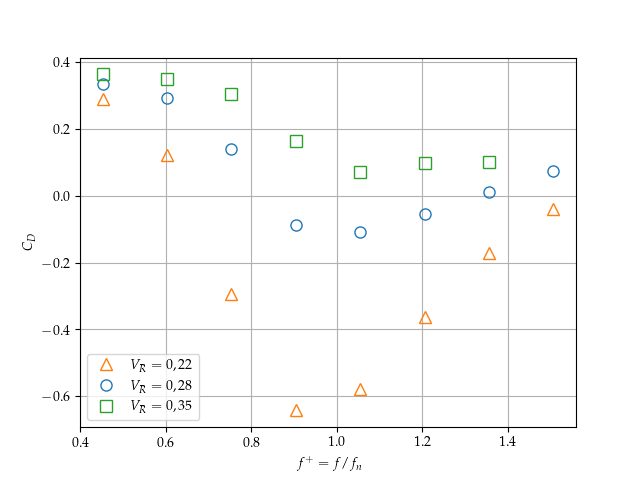

In [9]:
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
fig,ax = plt.subplots()
ax.plot(f_adim022,CD022,'^',color='tab:orange',markersize=8,label='$V_R=0,22$',fillstyle='none')
ax.plot(f_adim028,CD028,'o',color='tab:blue',markersize=8,label='$V_R=0,28$',fillstyle='none')
ax.plot(f_adim035,CD035,'s',color='tab:green',markersize=8,label='$V_R=0,35$',fillstyle='none')
ax.set_xlabel(r'$f^+=f/f_n$')
ax.set_ylabel('$C_D$')
ax.grid()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
ax.legend(loc='lower left',prop={'size': 11})
plt.savefig('CDVsFrecuencia.pdf') 
plt.savefig('CDVsFrecuencia.png') 

<IPython.core.display.Javascript object>


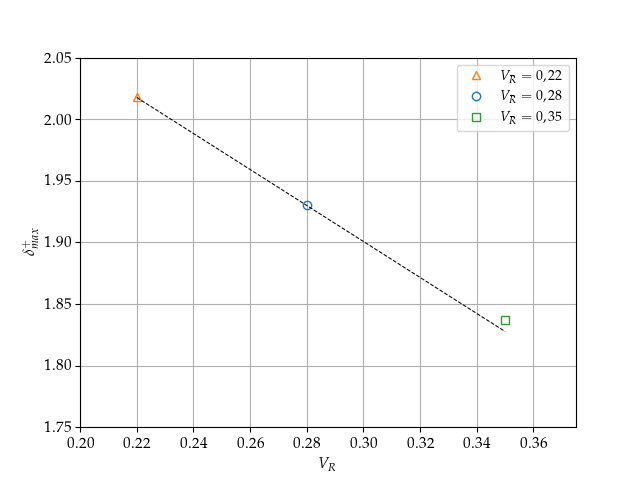

In [30]:
dmax022=d_c022[index_max022]
dmax028=d_c028[index_max028]
dmax035=d_c035[index_max035]
fmax022=f_c022[index_max022]
fmax028=f_c028[index_max028]
fmax035=f_c035[index_max035]
fmax=[fmax022,fmax028,fmax035]
dmax=[dmax022,dmax028,dmax035]
listaVR=[0.22,0.28,0.35]
listaMarkers=['^','o','s']
listaColores=['tab:orange','tab:blue','tab:green']
listaLabels=['$V_R=0,22$','$V_R=0,28$','$V_R=0,35$']
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
fig,ax = plt.subplots()
for i in range (0,3):
    ax.plot(listaVR[i],dmax[i],listaMarkers[i],color=listaColores[i],label=listaLabels[i],fillstyle='none')
zLineVrDeltaMax=np.polyfit(listaVR[0:2], dmax[0:2], 1)
fLineVrDeltaMax=np.poly1d(zLineVrDeltaMax)
f_cLineVrDeltaMax = np.linspace(listaVR[0],listaVR[2],20)
d_cLineVrDeltaMax = fLineVrDeltaMax(f_cLineVrDeltaMax)
ax.plot(f_cLineVrDeltaMax,d_cLineVrDeltaMax,linestyle='dashed',color='k',linewidth=0.75)
plt.show()
plt.legend(prop={'size': 11})
ax.set_xlim(0.2,0.375)
ax.set_ylim(1.75,2.05)
ax.set_xlabel(r'$V_R$',size=11)
ax.set_ylabel('$\delta^{+}_{max}$',size=11)
ax.grid()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.savefig('deltaMaxVsVR.pdf') 
plt.savefig('deltaMaxVsVR.png') 

<IPython.core.display.Javascript object>


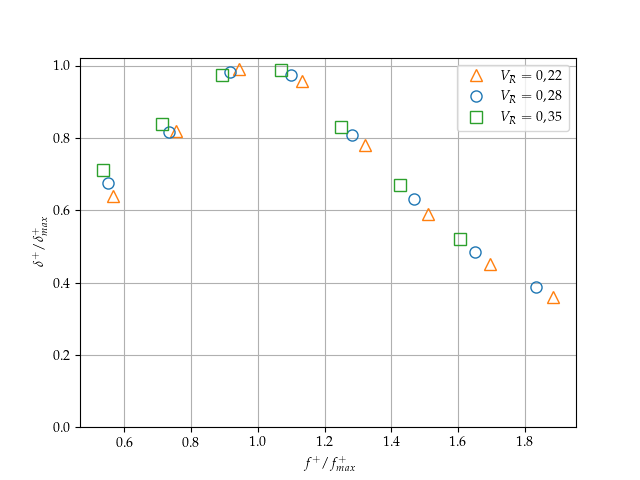

In [11]:
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
fig,ax = plt.subplots()
#Gráfico de los puntos de datos
ax.plot(f_adim022/fmax022,delta_adim022/dmax022,'^',color='tab:orange',markersize=8,label='$V_R=0,22$',fillstyle='none')
ax.plot(f_adim028/fmax028,delta_adim028/dmax028,'o',color='tab:blue',markersize=8,label='$V_R=0,28$',fillstyle='none')
ax.plot(f_adim035/fmax035,delta_adim035/dmax035,'s',color='tab:green',markersize=8,label='$V_R=0,35$',fillstyle='none')
ax.set_xlabel(r'$f^+/f^{+}_{max}$',size=11)
ax.set_ylabel(r'$\delta^+/\delta^{+}_{max}$',size=11)
ax.set_ylim(bottom=0)
ax.grid()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
ax.legend(prop={'size': 11})
plt.savefig('deltaDeltaMaxVsfrecFrecMax.pdf') 
plt.savefig('deltaDeltaMaxVsfrecFrecMax.png') 

<IPython.core.display.Javascript object>


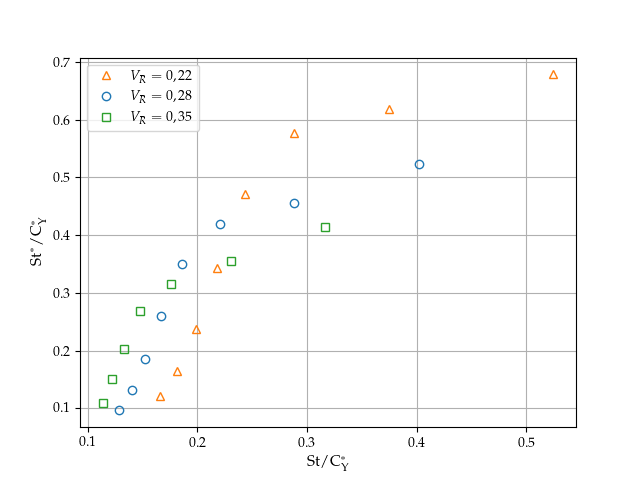

In [12]:
listaMarkers=['^','o','s']
listaColores=['tab:orange','tab:blue','tab:green']
listaLabels=['$V_R=0,22$','$V_R=0,28$','$V_R=0,35$']
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
fig,ax = plt.subplots()
ax.plot(StCy022,St2Cy022,listaMarkers[0],color=listaColores[0],label=listaLabels[0],fillstyle='none')
ax.plot(StCy028,St2Cy028,listaMarkers[1],color=listaColores[1],label=listaLabels[1],fillstyle='none')
ax.plot(StCy035,St2Cy035,listaMarkers[2],color=listaColores[2],label=listaLabels[2],fillstyle='none')
#zLineStCY=np.polyfit(StCy028[4:8], St2Cy028[4:8], 1)
#fLineStCY=np.poly1d(zLineStCY)
#f_cLineStCY = np.linspace(StCy028[2],StCy028[7],20)
#d_cLineStCY = fLineStCY(f_cLineStCY)
#ax.plot(f_cLineStCY,d_cLineStCY,linestyle='dashed',color='k',linewidth=0.75)
plt.show()
plt.legend()
#ax.set_xlim(0.2,0.4)
#ax.set_ylim(1.75,2.05)
ax.set_xlabel(r'$\mathrm{St}/\mathrm{C}_{\mathrm{Y}}^{*}$',size=11)
ax.set_ylabel(r'$\mathrm{St}^{*}/\mathrm{C}_{\mathrm{Y}}^{*}$',size=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
ax.grid()
plt.savefig('St2CYvsStCy.pdf') 
plt.savefig('St2CYvsStCy.png') 

<IPython.core.display.Javascript object>


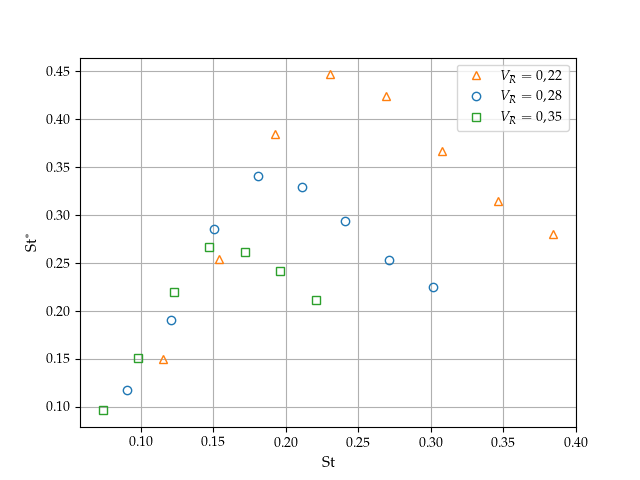

In [13]:
listaMarkers=['^','o','s']
listaColores=['tab:orange','tab:blue','tab:green']
listaLabels=['$V_R=0,22$','$V_R=0,28$','$V_R=0,35$']
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
fig,ax = plt.subplots()
ax.plot(St022,St2022,listaMarkers[0],color=listaColores[0],label=listaLabels[0],fillstyle='none')
ax.plot(St028,St2028,listaMarkers[1],color=listaColores[1],label=listaLabels[1],fillstyle='none')
ax.plot(St035,St2035,listaMarkers[2],color=listaColores[2],label=listaLabels[2],fillstyle='none')
#zLineStCY=np.polyfit(StCy028[4:8], St2Cy028[4:8], 1)
#fLineStCY=np.poly1d(zLineStCY)
#f_cLineStCY = np.linspace(StCy028[2],StCy028[7],20)
#d_cLineStCY = fLineStCY(f_cLineStCY)
#ax.plot(f_cLineStCY,d_cLineStCY,linestyle='dashed',color='k',linewidth=0.75)
plt.show()
plt.legend()
#ax.set_xlim(0.2,0.4)
#ax.set_ylim(1.75,2.05)
ax.set_xlabel(r'$\mathrm{St}$',size=11)
ax.set_ylabel(r'$\mathrm{St}^{*}$',size=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
ax.grid()
plt.savefig('St2vsSt.pdf') 
plt.savefig('St2vsSt.png') 

<IPython.core.display.Javascript object>


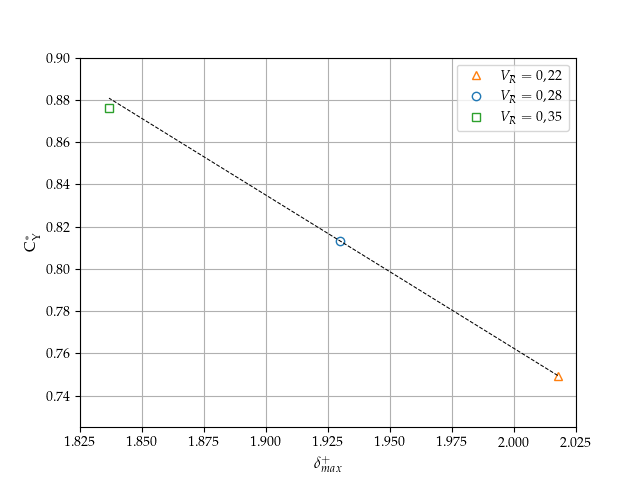

In [24]:
zCy028=np.polyfit(f_adim028[1:5], Cy028[1:5], 3)
fCy028=np.poly1d(zCy028)
fCy_c028 = np.linspace(f_adim028[1],f_adim028[4],100)
Cy_c028 = fCy028(f_c028)
#
zCy022=np.polyfit(f_adim022[1:5], Cy022[1:5], 3)
fCy022=np.poly1d(zCy022)
fCy_c022 = np.linspace(f_adim022[1],f_adim022[4],100)
Cy_c022 = fCy022(f_c022)
#
zCy035=np.polyfit(f_adim035[1:5], Cy035[1:5], 3)
fCy035=np.poly1d(zCy035)
fCy_c035 = np.linspace(f_adim035[1],f_adim035[4],100)
Cy_c035 = fCy035(f_c035)
#
CyDmax=[Cy_c022[index_max022],Cy_c028[index_max028],Cy_c035[index_max035]]
listaMarkers=['^','o','s']
listaColores=['tab:orange','tab:blue','tab:green']
listaLabels=['$V_R=0,22$','$V_R=0,28$','$V_R=0,35$']
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
fig,ax = plt.subplots()
for i in range (0,3):
    ax.plot(dmax[i],CyDmax[i],listaMarkers[i],color=listaColores[i],label=listaLabels[i],fillstyle='none')
zLineDeltaCauchy=np.polyfit(dmax[0:2],CyDmax[0:2], 1)
fLineDeltaCauchy=np.poly1d(zLineDeltaCauchy)
f_cLineDeltaCauchy = np.linspace(dmax[0],dmax[2],20)
d_cLineDeltaCauchy = fLineDeltaCauchy(f_cLineDeltaCauchy)
ax.plot(f_cLineDeltaCauchy,d_cLineDeltaCauchy,linestyle='dashed',color='k',linewidth=0.75)
plt.show()
plt.legend(prop={'size': 11})
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
ax.set_xlim(1.825,2.025)
ax.set_ylim(0.725,0.90)
ax.set_xlabel(r'$\delta^{+}_{max}$',size=11)
ax.set_ylabel('$\mathrm{C}_{\mathrm{Y}}^{*}$',size=11)
ax.grid()
plt.savefig('CauchyVsDeltaMax.pdf') 
plt.savefig('CauchyVsDeltaMax.png') 

<IPython.core.display.Javascript object>


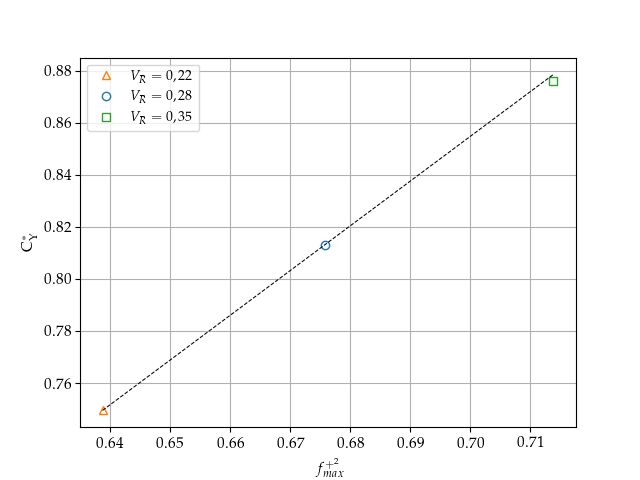

In [33]:
listaMarkers=['^','o','s']
listaColores=['tab:orange','tab:blue','tab:green']
listaLabels=['$V_R=0,22$','$V_R=0,28$','$V_R=0,35$']
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
fmaxNP=np.array(fmax)
fmaxSquared=fmaxNP**2
fig,ax = plt.subplots()
for i in range (0,3):
    ax.plot(fmaxSquared[i],CyDmax[i],listaMarkers[i],color=listaColores[i],label=listaLabels[i],fillstyle='none')
zLineFCauchy=np.polyfit(fmaxSquared[0:2],CyDmax[0:2], 1)
fLineFCauchy=np.poly1d(zLineFCauchy)
f_cLineFCauchy = np.linspace(fmaxSquared[0],fmaxSquared[2],20)
d_cLineFCauchy = fLineFCauchy(f_cLineFCauchy)
ax.plot(f_cLineFCauchy,d_cLineFCauchy,linestyle='dashed',color='k',linewidth=0.75)
plt.show()
plt.legend()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
ax.set_xlabel(r'$f^{+^2}_{max}$',size=11)
ax.set_ylabel('$\mathrm{C}_{\mathrm{Y}}^{*}$',size=11)
ax.grid()
plt.savefig('CauchyVsFMax2.pdf') 
plt.savefig('CauchyVsFMax2.png') 